# Combine tiles across NSW of the selection of different FMC layers
 - combine 102 netcdf files for each layer

In [1]:
import xarray as xr
import glob
import os

In [2]:
# Set path to layers/ which contains tiles/ with one netcdf per tile of NSW per function (compute_layers_fmc.ipynb output)
pth = 'layers/'

In [3]:
def layer_merge():
    funcs = [
        'mean','std','5th_perc','seas_5th_perc','dryq_5th_per','perc_obs_below1sd'
    ]
    for func_name in funcs:
        # Get path to all layers (one in all tile directories)
        files_merge = pth+f'tiles/*_*/fmc_nsw_*_{func_name}.nc' 
        # print(files_merge)
        to_merge = glob.glob(files_merge)
        to_merge.sort()
        
        # Define path to write to (top level of layers/ directory)
        outpath = pth+f'fmc_nsw_{func_name}.nc'
        # print(outpath)
        
        if os.path.isfile(outpath):
            continue
        else:
            ds = xr.open_mfdataset(to_merge,chunks='auto')
            # print(ds)
            
            # Open files into one, then write to netcdf with compression encoding
            encoding = {f'fmc_{func_name}':{'zlib': True, "complevel": 1, 'shuffle': True}}
            ds.to_netcdf(outpath, encoding=encoding)

In [4]:
## Use this if converting to a plain python script
# if __name__ == "__main__":
    # Set path to layers/ which contains tiles/ with one netcdf per tile of NSW per function (compute_layers_fmc.ipynb output)
    # pth = 'layers/'
    # layer_merge()

In [5]:
# Set path to layers/ which contains tiles/ with one netcdf per tile of NSW per function (compute_layers_fmc.ipynb output)
pth = '/g/data/bz23/IvanK/fmc_rf_nsw/layers/'

In [6]:
%%time

layer_merge()

CPU times: user 12.2 s, sys: 5.93 s, total: 18.1 s
Wall time: 20.2 s


In [7]:
# Check output
ds = xr.open_dataset('/g/data/bz23/IvanK/fmc_rf_nsw/layers/fmc_nsw_mean_test.nc')
ds

<xarray.Dataset>
Dimensions:      (y: 10000, x: 10000)
Coordinates:
  * y            (y) float64 4.345e+06 4.345e+06 ... 4.145e+06 4.145e+06
  * x            (x) float64 9.415e+06 9.415e+06 ... 9.615e+06 9.615e+06
    spatial_ref  int32 ...
Data variables:
    fmc_mean     (y, x) float32 ...

In [ ]:
ds.fmc_mean.plot();

In [14]:
spatial_ref = xr.open_dataset('/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/8714665_4445050/fmc_nsw_8714665_4445050_mean.nc').spatial_ref
to_merge = ['/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_4945050/fmc_nsw_9914665_4945050_mean.nc', # TEMP remove tiles
         '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_5045050/fmc_nsw_9914665_5045050_mean.nc']

# Function to fix datasets which somehow had the time dimension assigned to the spatial_ref coordinate
for func_name in ['mean','std','5th_perc','seas_5th_perc'][:1]: # TODO remove selection
    # encoding = {f'fmc_{func_name}':{'zlib': True, "complevel": 1, 'shuffle': True}}
    for path in to_merge:
        print(path)
        outpath = path[:-3]+'_fixed.nc'
        ds = xr.open_dataset(path,chunks='auto')
        # print(ds)
        if len(ds.spatial_ref.shape) > 0: # checks if the shape is empty
            print('Modifying',path)
            ds = ds.drop(['spatial_ref','time'])
            ds = ds.assign_coords({'spatial_ref':spatial_ref})
            print('Writing to',outpath)
            ds.to_netcdf(outpath)
            # print(ds)
        else:
            continue

/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_4945050/fmc_nsw_9914665_4945050_mean.nc
/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_5045050/fmc_nsw_9914665_5045050_mean.nc
Modifying /g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_5045050/fmc_nsw_9914665_5045050_mean.nc
Writing to /g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_5045050/fmc_nsw_9914665_5045050_mean_fixed.nc


How many layers have the spatial_ref error?

In [36]:
# Find files that need to be fixed
paths = glob.glob('/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/*/*.nc')
# for func_name in ['mean','std','5th_perc','seas_5th_perc'][:]: # TODO remove selection
#     print(func_name)
# encoding = {f'fmc_{func_name}':{'zlib': True, "complevel": 1, 'shuffle': True}}
to_fix = []
for path in paths:
    # print(path)
    # outpath = path[:-3]+'_fixed.nc'
    ds = xr.open_dataset(path,chunks='auto')
    # print(ds)
    if len(ds.spatial_ref.shape) > 0: # checks if the shape is empty
        # print('True')
        to_fix.append(path)

In [37]:
to_fix

['/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9314665_4945050/fmc_nsw_9314665_4945050_mean.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9014665_4345050/fmc_nsw_9014665_4345050_std.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9014665_4345050/fmc_nsw_9014665_4345050_seas_5th_perc.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9014665_4345050/fmc_nsw_9014665_4345050_5th_perc.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9014665_4345050/fmc_nsw_9014665_4345050_mean.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9114665_4245050/fmc_nsw_9114665_4245050_mean.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9114665_4245050/fmc_nsw_9114665_4245050_seas_5th_perc.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9114665_4245050/fmc_nsw_9114665_4245050_5th_perc.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9114665_4245050/fmc_nsw_9114665_4245050_std.nc',
 '/g/data/bz23/IvanK/fmc_rf_nsw/layers/tiles/9914665_5045050/fmc_nsw_9914665_5045050_mean.nc',
 '/g/data/bz23/IvanK/fmc_r

In [64]:
# Check output
ds = xr.open_dataset('/g/data/bz23/IvanK/fmc_rf_nsw/layers/fmc_nsw_mean_test.nc')
ds

<xarray.Dataset>
Dimensions:      (y: 10000, x: 1775)
Coordinates:
  * y            (y) float64 5.045e+06 5.045e+06 ... 4.845e+06 4.845e+06
  * x            (x) float64 9.915e+06 9.915e+06 9.915e+06 ... 9.95e+06 9.95e+06
    spatial_ref  int32 ...
Data variables:
    fmc_mean     (y, x) float32 ...

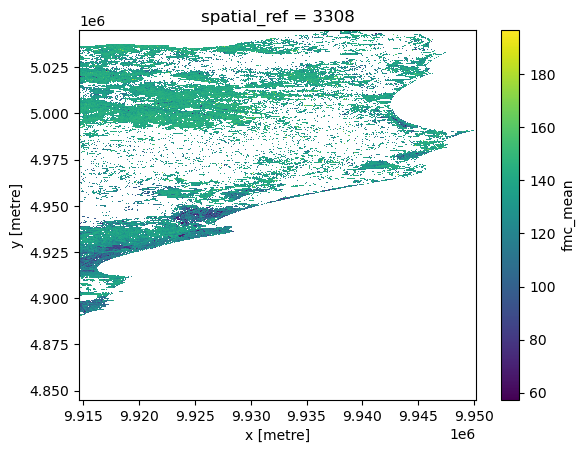

In [46]:
ds.fmc_mean.plot();